In [32]:
#Importing the libraries 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 
import pickle

In [16]:
# Importing the stock data and storing it in a dataframe

import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

RawStockData = pd.DataFrame(json_data)
bna_data = RawStockData[RawStockData['Stock_name'] == 'BNA']
bna_data.reset_index(inplace=True)
columnsToExclude = ['Code_isin','index','Stock_name']
bna_data = bna_data.drop(columns=columnsToExclude)
bna_data = bna_data.sort_values(by='Date')
print(bna_data)

            Date  Adj_Close  Adj_low  Adj_High         Volume
2688  2011-01-03     11.173   10.952    11.298    1721.199951
2687  2011-01-04     11.129   10.952    11.129  105979.023438
2686  2011-01-05     11.349   10.989    11.349   86125.226562
2685  2011-01-06     11.283   11.173    11.393   43161.000000
2684  2011-01-07     11.305   11.210    11.320   52695.449219
...          ...        ...      ...       ...            ...
4     2021-10-29      7.340    7.300     7.340    6610.660156
3     2021-11-01      7.320    7.200     7.340    5781.819824
2     2021-11-02      7.310    7.200     7.320   24964.289062
1     2021-11-03      7.320    7.100     7.320   34433.000000
0     2021-11-04      7.320    7.220     7.320    6137.930176

[2689 rows x 5 columns]


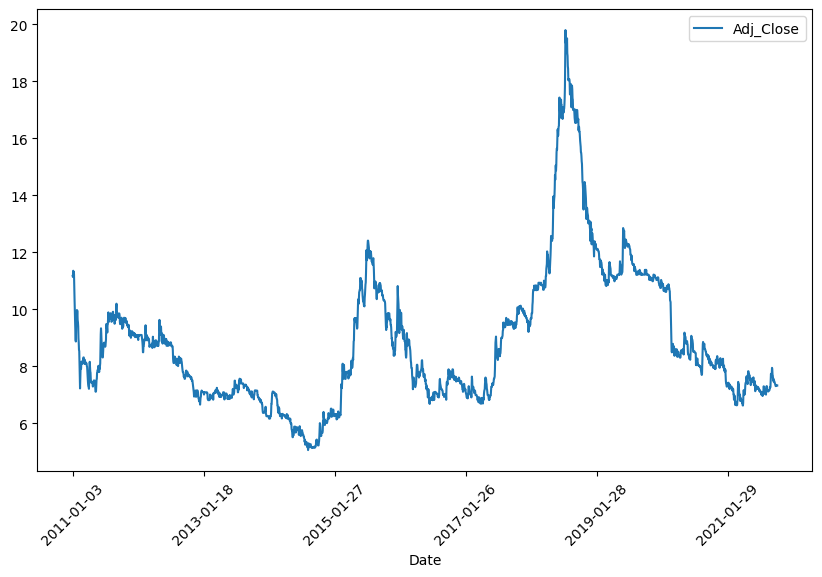

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed
bna_data.plot(x='Date', y='Adj_Close', ax=ax)
plt.xticks(rotation=45)
plt.show()

In [19]:
#Creating the model
model = RandomForestRegressor()

In [20]:
#Training the model
X = bna_data[['Adj_low','Adj_High','Volume']]
X = X[:int(len(bna_data)-1)]
y = bna_data['Adj_Close']
y = y[:int(len(bna_data)-1)]
model.fit(X,y)

RandomForestRegressor()

In [21]:
#Test the model 
predictions = model.predict(X)
print('The models score is :', model.score(X,y))

The models scores is : 0.9872836993479125


In [30]:
#Make the predictions 
test_data = bna_data[['Adj_low','Adj_High','Volume']].tail(2)
print(test_data)
test_data = test_data[['Adj_low','Adj_High','Volume']].head(1)
print(test_data)
prediction = model.predict(test_data)
print('The model predicts the last row or day to be : ' , prediction)
print('Actual value is  :' , bna_data[['Adj_Close']].tail(1).values[0][0])  

   Adj_low  Adj_High        Volume
1     7.10      7.32  34433.000000
0     7.22      7.32   6137.930176
   Adj_low  Adj_High   Volume
1      7.1      7.32  34433.0
The model predicts the last row or day to be :  [7.27307]
Actual value is  : 7.32


In [33]:
#Saving the model
with open('RenderForestPredictionStock.pkl', 'wb') as file:
    pickle.dump(model, file)

In [34]:
#Loading the model 
with open('RenderForestPredictionStock.pkl', 'rb') as file:
    model = pickle.load(file)